<div style="border:solid green 2px; padding: 20px"> 
Oi Matheus, tudo bem? 
    
Me chamo Lourenço, vou ser o corretor em português do seu projeto! Prazer em conhecê-lo! 🙌 
 
Meus comentários irão seguir o seguinte padrão:

<div class="alert alert-success">
    <b>Correto:</b> Cumpriu corretamente tudo que foi pedido
</div>
<div class="alert alert-warning">
    <b>Recomendação:</b> Existe espaço para melhoramento do código
</div>
<div class="alert alert-danger">
    <b>Precisa ser corrigido:</b> Esse tipo de comentário ocorre quando o código precisa de alguma mudança drástica. O projeto não pode ser aceito com comentários vermelhos.
</div>
    
Por favor, não delete meus comentários :) Se tiver alguma pergunta, basta respondê-los a partir da célula:
    
<div class="alert alert-block alert-info">
    <b>Comentário do aluno:</b> Copie essa célula e mude o texto para responder aos meus comentários.
</div>  

<div class="alert alert-block alert-success">
<b>Comentário geral do corretor</b> <a class="tocSkip"></a>

Matheus, primeiramente muito obrigado por enviar o seu projeto! Está claro para mim seu empenho em fazê-lo.
    
<br />
    
Seu projeto está **exemplar**!! Todas as questões foram magistralmente respondidas, seu código está claro e o seu raciocínio está bem embasado. Você fez uso correto de todas as principais técnicas envolvidas nesse projeto. Além disso, suas correções foram corretas e bem embasadas, parabéns! Por conta disso, seu projeto será **aprovado**!
    
<br />
    
Espero que você consiga manter esse ritmo nos próximos módulos e que o seu aprendizado continue sendo frutífero. Não hesite em contatar nossos **tutores** em caso de dúvidas. Um abraço!    
    
    
</div>

# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Iniciação

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

# Importando libs de plots
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pal = sns.color_palette('rainbow')
pal.as_hex()

['#386df9', '#12c8e6', '#5af8c8', '#a4f89f', '#ecc86f', '#ff6d38']

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Sempre importante manter as bibliotecas organizadas!
</div>

### Carregue dados

In [3]:
# Carregue o arquivo com os dados em um DataFrame
df = pd.read_csv("/datasets/vehicles_us.csv")

### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada

In [4]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# imprima uma amostragem dos dados
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Conclusões e próximos passos

Existem varias colunas com valores nulos, sendo elas:

    - odometer:
        Irei tilizar a mediana da kilometragem/ano do veículo por faixa de ano, utilizarei o ano do veículo para encontrar em que faixa se encontra, depois irei multiplicar a idade pela média km/year para substituir valores NaN.
        
    - model_year:
        Decido utilizar os valores de km/year médios obtidos por faixa de idade no item anterior "odometer". Analisarei por valores de 'condition'

    - cylinders:
        Irei utilizar o modelo do veículo para obter a quantidade de veículos com tantos cilindros, pelo valor maximo de veículos, retornarei o valor 'cylinders, substituindo os valorer NaN por estes.
    
    - paint_color:
        Como a cor do veículo não correlaciona com nada, existe a opção de subsituir os valores ausenter por "Unknown"(desconhecido) ou utilizar a cor que mais aparece nos modelos, optei por deixar como desconhecido.
        
    - is_4wd:
        Praticamente metade dos valores são nulos, requer uma atenção especial. Observei que os valores que não são NaN são 1, numero utilizado para indicar "Sim", o veículo é tracionado, logo os outros valores devem ser "Não", representados por 0. Irei subsituir os valores NaN por 0(Zero).
    
A coluna model_year, cylinders e is_4wd estão com o tipo flot, sendo int64 o mais apropriado.

<div class="alert alert-block alert-warning">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok! Só cuidado com a coluna 'is_4wd' pois o mais apropriado é ser uma coluna booleana.
</div>

## Cuide dos valores ausentes (se houver algum)

### Odometer

In [6]:
# ODOMETER
df["odometer"].isna().value_counts(normalize=True)

False    0.846832
True     0.153168
Name: odometer, dtype: float64

In [7]:
# 15% dos dados tem o valor "odometer" como NaN

In [8]:
# Analise de valores médios de km/year por algumas faixas de ano.

In [9]:
od_09_19 = df.query("model_year > 2009").pivot_table(index="model_year", values="odometer", aggfunc="median")["odometer"].mean() / 10
od_09_19

7595.69

In [10]:
od_99_09 = df.query("model_year <= 2009 and model_year > 1999 ").pivot_table(index="model_year", values="odometer", aggfunc="median")["odometer"].mean() / 10
od_99_09

15548.075

In [11]:
od_98_99 = df.query("model_year <= 1999 and model_year > 1989 ").pivot_table(index="model_year", values="odometer", aggfunc="median")["odometer"].mean() / 10
od_98_99

16213.465

In [12]:
od_50_90 = df.query("model_year > 1950 and model_year < 1990 ").pivot_table(index="model_year", values="odometer", aggfunc="median")["odometer"].mean() / 10
od_50_90

6363.775757575758

In [13]:
# Substituirei os valores NaN pela média por faixa.
def odometer_fix(row):
    if pd.isna(row["odometer"]):
        if row["model_year"] in range(1990, 2010):
            return  (2019 - row["model_year"]) * od_99_09
        if row["model_year"] <= 1989:
            return  (2019 - row["model_year"]) * od_50_90
        if row["model_year"] > 2009:
            return (2019 - row["model_year"]) * od_09_19
    else:
        return row["odometer"]

In [14]:
df["odometer"] = df.apply(odometer_fix, axis=1)

In [15]:
df["odometer"].isna().value_counts()

False    50976
True       549
Name: odometer, dtype: int64

In [16]:
# Continuo com alguns valores nulos, abaixo investigo o que pode ter acontecido.

In [17]:
df.query("odometer.isna()")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,NaN,2018-05-13,57
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,NaN,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,NaN,NaN,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,NaN,NaN,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,NaN,2018-12-09,23
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,NaN,2018-10-16,75
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,NaN,2019-03-16,83


In [18]:
# Aqui confirmo que todos os valores de odometer NaN vem de linhas com model_year também NaN.
df.query("odometer.isna() and model_year.isna()")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,NaN,2018-05-13,57
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,NaN,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,NaN,NaN,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,NaN,NaN,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,NaN,2018-12-09,23
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,NaN,2018-10-16,75
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,NaN,2019-03-16,83


In [19]:
549/51525

0.010655021834061135

In [20]:
# Como essas linhas onde model_year e odometer são NaN representam apenas 1% do meu dataframe, decido dropar estas linhas.

In [21]:
df.drop(df.query("odometer.isna() and model_year.isna()").index, inplace=True)

In [22]:
# Verificação final se restam valores nulos
df.query("odometer.isna()")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Bem explicado!
</div>

### Model_year

In [23]:
# Model_year
df["model_year"].isna().value_counts(normalize=True)

False    0.939776
True     0.060224
Name: model_year, dtype: float64

In [24]:
# 6% dos meus dados tem valores de model_year como NaN

In [25]:
df.query("model_year.isna()").head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


In [26]:
df.pivot_table(index="condition", values="odometer", aggfunc="mean")

,odometer
condition,
excellent,105646.276630
fair,192008.010830
good,131059.553943
like new,78463.397640
new,45185.303741
salvage,147699.590219


(1990.0, 2020.0)

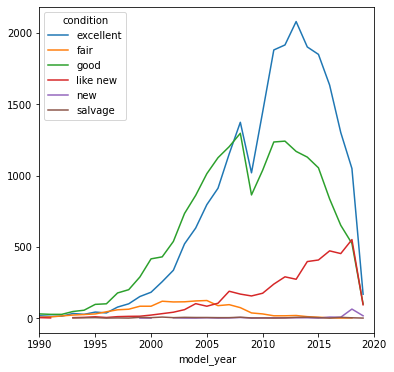

In [27]:
df.pivot_table(index="model_year", columns="condition", values="odometer", aggfunc="count").plot(figsize=(6, 6))
plt.xlim([1990,2020])

In [28]:
# A quantidade de carros NEW começa a crescer a partidar do model_year >2000 e LIKE_NEW >2015

In [29]:
# Enquanto os outros valores de condition vem desde 1990 menos.

In [30]:
# Decido utilizar os valores de km/year médios obtidos no item anterior odometer.
# Para carros "like new" e "new" utilizarei a km/year média do período model_year 2000+.
# Para as outras categorias utilizarei o valores médio do período 2000-.

In [31]:
def model_year_fix(row):
    if pd.isna(row["model_year"]):
        if row["condition"] in ["like new", "new"]:
            return round(2019 - row["odometer"] / od_09_19)
        else:
            return round(2019 - row["odometer"] / od_99_09)
    else:
        return row["model_year"]

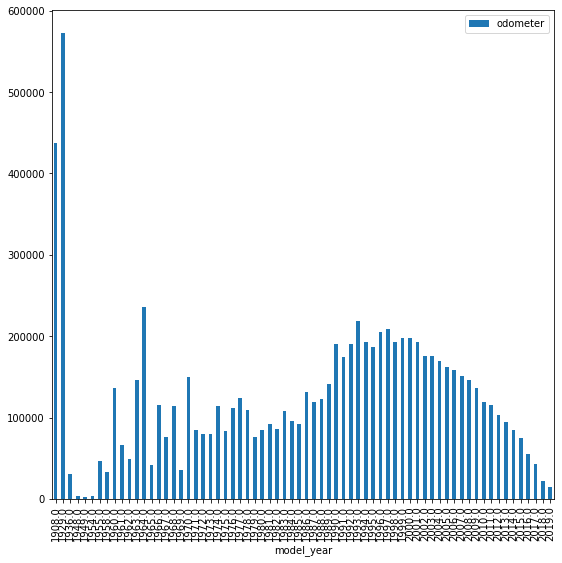

In [32]:
# Distribuição antes
df.pivot_table(index="model_year", values="odometer").plot(kind="bar", figsize=(9,9))
plt.show()

In [33]:
df["model_year"] = df.apply(model_year_fix, axis=1)

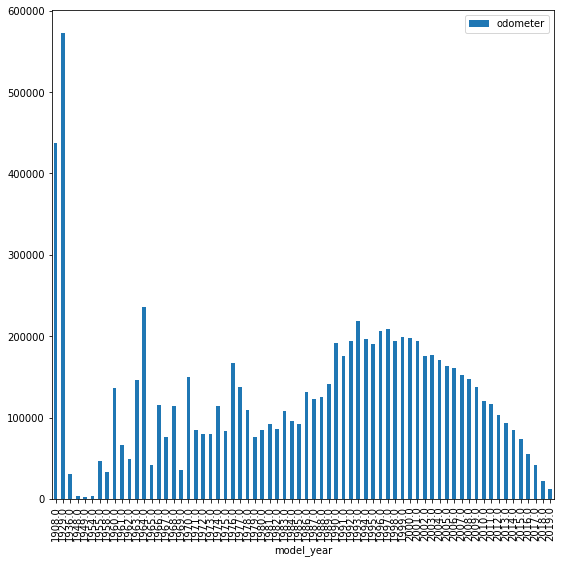

In [34]:
# Distribuição depois
df.pivot_table(index="model_year", values="odometer").plot(kind="bar", figsize=(9, 9))
plt.show()

In [35]:
# Verificação final se restam valores nulos
df["model_year"].isna().value_counts()

False    50976
Name: model_year, dtype: int64

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Muito bom Matheus!
</div>

### Cylinders

In [36]:
df["cylinders"].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [37]:
df.pivot_table(index="cylinders", values="model_year" ,columns="model", aggfunc="count")

model,acura tl,bmw x5,buick enclave,cadillac escalade,chevrolet camaro,chevrolet camaro lt coupe 2d,chevrolet colorado,chevrolet corvette,chevrolet cruze,chevrolet equinox,chevrolet impala,chevrolet malibu,chevrolet silverado,chevrolet silverado 1500,chevrolet silverado 1500 crew,chevrolet silverado 2500hd,chevrolet silverado 3500hd,chevrolet suburban,chevrolet tahoe,chevrolet trailblazer,chevrolet traverse,chrysler 200,chrysler 300,chrysler town & country,dodge charger,dodge dakota,dodge grand caravan,ford econoline,ford edge,ford escape,ford expedition,ford explorer,ford f-150,ford f-250,ford f-250 sd,ford f-250 super duty,ford f-350 sd,ford f150,ford f150 supercrew cab xlt,ford f250,ford f250 super duty,ford f350,ford f350 super duty,ford focus,ford focus se,ford fusion,ford fusion se,ford mustang,ford mustang gt coupe 2d,ford ranger,ford taurus,gmc acadia,gmc sierra,gmc sierra 1500,gmc sierra 2500hd,gmc yukon,honda accord,honda civic,honda civic lx,honda cr-v,honda odyssey,honda pilot,hyundai elantra,hyundai santa fe,hyundai sonata,jeep cherokee,jeep grand cherokee,jeep grand cherokee laredo,jeep liberty,jeep wrangler,jeep wrangler unlimited,kia sorento,kia soul,mercedes-benz benze sprinter 2500,nissan altima,nissan frontier,nissan frontier crew cab sv,nissan maxima,nissan murano,nissan rogue,nissan sentra,nissan versa,ram 1500,ram 2500,ram 3500,subaru forester,subaru impreza,subaru outback,toyota 4runner,toyota camry,toyota camry le,toyota corolla,toyota highlander,toyota prius,toyota rav4,toyota sienna,toyota tacoma,toyota tundra,volkswagen jetta,volkswagen passat
cylinders,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,5.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4.0,3.0,NaN,1.0,NaN,9.0,NaN,79.0,3.0,399.0,417.0,41.0,429.0,5.0,4.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,166.0,5.0,7.0,5.0,3.0,4.0,NaN,77.0,490.0,2.0,21.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,645.0,331.0,400.0,243.0,51.0,NaN,120.0,11.0,NaN,NaN,1.0,NaN,NaN,669.0,699.0,232.0,609.0,7.0,2.0,367.0,74.0,364.0,91.0,2.0,2.0,10.0,94.0,10.0,118.0,297.0,NaN,648.0,38.0,NaN,1.0,13.0,420.0,434.0,248.0,1.0,NaN,NaN,431.0,210.0,434.0,11.0,759.0,258.0,558.0,30.0,423.0,348.0,8.0,239.0,1.0,337.0,239.0
5.0,NaN,NaN,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,122.0,43.0
6.0,207.0,199.0,240.0,3.0,223.0,279.0,101.0,NaN,3.0,111.0,526.0,104.0,123.0,218.0,34.0,2.0,NaN,3.0,8.0,213.0,291.0,51.0,215.0,236.0,194.0,110.0,523.0,5.0,263.0,264.0,31.0,649.0,858.0,7.0,1.0,1.0,NaN,175.0,263.0,3.0,5.0,NaN,NaN,4.0,NaN,84.0,31.0,340.0,NaN,244.0,260.0,269.0,34.0,48.0,2.0,2.0,190.0,3.0,1.0,5.0,394.0,266.0,2.0,170.0,68.0,161.0,487.0,174.0,303.0,874.0,396.0,90.0,NaN,31.0,68.0,203.0,312.0,256.0,186.0,5.0,3.0,NaN,196.0,626.0,314.0,3.0,2.0,42.0,346.0,128.0,20.0,3.0,265.0,1.0,53.0,283.0,480.0,33.0,4.0,29.0
8.0,NaN,49.0,1.0,285.0,105.0,NaN,1.0,449.0,NaN,NaN,37.0,10.0,989.0,1698.0,231.0,820.0,218.0,492.0,617.0,12.0,NaN,NaN,57.0,NaN,129.0,108.0,NaN,180.0,NaN,2.0,288.0,72.0,1563.0,344.0,336.0,202.0,244.0,306.0,42.0,287.0,302.0,203.0,212.0,NaN,NaN,NaN,NaN,206.0,260.0,2.0,1.0,NaN,324.0,752.0,388.0,295.0,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,7.0,213.0,43.0,2.0,7.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1335.0,314.0,68.0,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,498.

In [38]:
x = df.pivot_table(index="cylinders", values="model_year" ,columns="model", aggfunc="count")["acura tl"]
x

cylinders
3.0       NaN
4.0       3.0
5.0       NaN
6.0     207.0
8.0       NaN
10.0      NaN
12.0      NaN
Name: acura tl, dtype: float64

In [39]:
def cylinders_fix(row):
    if pd.isna(row["cylinders"]):
        x = df.pivot_table(index="cylinders", values="model_year" ,columns="model", aggfunc="count")[row["model"]]
        return x[x == x.max()].index[0]
    else:
        return row["cylinders"]

<font color='red'># Aplicação desta função está extremamente lenta, não achei outra forma <font>

In [40]:
%%time
df["cylinders"] = df.apply(cylinders_fix, axis=1)

CPU times: user 51 s, sys: 59.6 ms, total: 51.1 s
Wall time: 52.2 s


In [41]:
# Verificação final se restam valores nulos
df["cylinders"].isna().value_counts()

False    50976
Name: cylinders, dtype: int64

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok!
</div>

### is_4wd

In [42]:
df["is_4wd"].isna().value_counts()

True     25667
False    25309
Name: is_4wd, dtype: int64

In [43]:
def is_4wd_fix(row):
    if pd.isna(row["is_4wd"]):
        return 0
    else:
        return 1

In [44]:
df["is_4wd"] = df.apply(is_4wd_fix, axis=1)

In [45]:
# Verificação final se restam valores nulos
df["is_4wd"].isna().value_counts()

False    50976
Name: is_4wd, dtype: int64

<div class="alert alert-block alert-warning">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok! Pense que se existem apenas valores 0 e 1, a coluna pode ser booleana.
</div>

### Paint_color

In [46]:
df["paint_color"].value_counts()

white     9940
black     7607
silver    6174
grey      4986
blue      4417
red       4377
green     1382
brown     1202
custom    1138
yellow     255
orange     229
purple      99
Name: paint_color, dtype: int64

In [47]:
df["paint_color"].isna().value_counts(normalize=True)

False    0.820111
True     0.179889
Name: paint_color, dtype: float64

In [49]:
def paint_color_fix(row):
    if pd.isna(row["paint_color"]):
        return "Unknown"
    else:
        return row["paint_color"]

In [50]:
df["paint_color"] = df.apply(paint_color_fix, axis=1)

In [126]:
# Verificação final se restam valores nulos
df["paint_color"].isna().value_counts(normalize=True)

False    1.0
Name: paint_color, dtype: float64

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok!
</div>

## Corrija os tipos de dados

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50976 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50976 non-null  int64  
 1   model_year    50976 non-null  float64
 2   model         50976 non-null  object 
 3   condition     50976 non-null  object 
 4   cylinders     50976 non-null  float64
 5   fuel          50976 non-null  object 
 6   odometer      50976 non-null  float64
 7   transmission  50976 non-null  object 
 8   type          50976 non-null  object 
 9   paint_color   50976 non-null  object 
 10  is_4wd        50976 non-null  int64  
 11  date_posted   50976 non-null  object 
 12  days_listed   50976 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.4+ MB


In [53]:
data_types_dict = {"model_year": int, "cylinders": int, "odometer": int}
data_types_dict

{'model_year': int, 'cylinders': int, 'odometer': int}

In [54]:
df = df.astype(data_types_dict)

In [55]:
df["date_posted"] = pd.to_datetime(df["date_posted"], format="%Y-%m-%d")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50976 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         50976 non-null  int64         
 1   model_year    50976 non-null  int64         
 2   model         50976 non-null  object        
 3   condition     50976 non-null  object        
 4   cylinders     50976 non-null  int64         
 5   fuel          50976 non-null  object        
 6   odometer      50976 non-null  int64         
 7   transmission  50976 non-null  object        
 8   type          50976 non-null  object        
 9   paint_color   50976 non-null  object        
 10  is_4wd        50976 non-null  int64         
 11  date_posted   50976 non-null  datetime64[ns]
 12  days_listed   50976 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.4+ MB


<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok!
</div>

## Enriqueça os dados

### Age_when_posted

In [57]:
# Adicione a idade do veículo quando a propaganda foi colocada
df["age_when_posted"] = df["date_posted"].dt.year - df["model_year"]

In [58]:
df["age_when_posted"].isna().value_counts()

False    50976
Name: age_when_posted, dtype: int64

### Km/year

<font color='red'>Não sei porque 65 linhas ficaram com valores NaN ao dividir 0 por 0 ao invés de dar raise ZeroDivisionError</font>

In [59]:
# Adicione a quilometragem média por ano
try:
    df["km_year"] = round(df["odometer"] / (2019 - df["model_year"]))
except ZeroDivisionError:
    df["km_year"] = df["odometer"]

In [60]:
df["km_year"]

0        18125.0
1        14784.0
2        18333.0
3        15548.0
4        40452.0
          ...   
51520    14689.0
51521    10676.0
51522    12800.0
51523    23262.0
51524     7596.0
Name: km_year, Length: 50976, dtype: float64

In [61]:
df["km_year"].isna().value_counts()

False    50911
True        65
Name: km_year, dtype: int64

In [127]:
# Aqui investigo o que aconteceu e percebo que os valores NaN advêm de model_year = 2019

In [62]:
df.query("km_year.isna()").head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_when_posted,km_year
125,22900,2019,nissan frontier crew cab sv,good,6,gas,0,other,pickup,blue,1,2019-04-15,67,0,NaN
843,22300,2019,nissan frontier crew cab sv,good,6,gas,0,other,pickup,black,1,2019-01-22,32,0,NaN
1375,5888,2019,toyota 4runner,good,6,gas,0,automatic,SUV,black,0,2019-02-22,36,0,NaN
1641,36588,2019,chevrolet traverse,like new,6,gas,0,automatic,SUV,white,0,2019-02-20,30,0,NaN
1711,59589,2019,chevrolet silverado 2500hd,excellent,8,diesel,0,automatic,truck,white,1,2019-01-13,0,0,NaN


In [128]:
# Irei testar manualmente a função na linha 125.

In [63]:
a = df.iloc[[125]]["date_posted"].dt.year
a

125    2019
Name: date_posted, dtype: int64

In [64]:
b = df.iloc[[125]]["odometer"]
b

125    0
Name: odometer, dtype: int64

In [65]:
b / (2019 - a)

125   NaN
dtype: float64

In [ ]:
# Realmente a divisão resulta em NaN

In [129]:
# Como estes valores eram para resultar em zero, utilizarei a função fillna para estes.

In [66]:
df["km_year"] = df["km_year"].fillna(0)

In [130]:
# Verificação final se restam valores nulos
df["km_year"].isna().value_counts()

False    50976
Name: km_year, dtype: int64

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok!
</div>

### Condition_to_numerical

Irei substituir as strings em condition para numero para facilitar a análise mais pra frente:

novo = 5
como novo = 4
excellente = 3
bom = 2
razoável = 1
sucata = 0

In [68]:
condition_dict = {"salvage": 0, "fair": 1, "good": 2, "excellent": 3, "like new": 4, "new": 5}
condition_dict

{'salvage': 0, 'fair': 1, 'good': 2, 'excellent': 3, 'like new': 4, 'new': 5}

In [131]:
# Salvo esta substituição em um novo dataframe
df2 = df.replace({"condition": condition_dict})

In [70]:
df2.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_when_posted,km_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,Unknown,1,2018-06-23,19,7,18125.0
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,5,14784.0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,6,18333.0
3,1500,2003,ford f-150,1,8,gas,248769,automatic,pickup,Unknown,0,2019-03-22,9,16,15548.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2,40452.0


<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ótimo!
</div>

## Verifique os dados limpos

[Já que os dados estão prontos para a análise, dê apenas uma rápida olhada neles. É útil ver o que exatamente você vai usar para a análise.]

In [132]:
# imprima as informações gerais/resumidas sobre o DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50976 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            50976 non-null  int64         
 1   model_year       50976 non-null  int64         
 2   model            50976 non-null  object        
 3   condition        50976 non-null  int64         
 4   cylinders        50976 non-null  int64         
 5   fuel             50976 non-null  object        
 6   odometer         50976 non-null  int64         
 7   transmission     50976 non-null  object        
 8   type             50976 non-null  object        
 9   paint_color      50976 non-null  object        
 10  is_4wd           50976 non-null  int64         
 11  date_posted      50976 non-null  datetime64[ns]
 12  days_listed      50976 non-null  int64         
 13  age_when_posted  50976 non-null  int64         
 14  km_year          50976 non-null  float

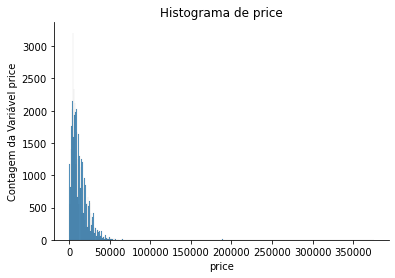

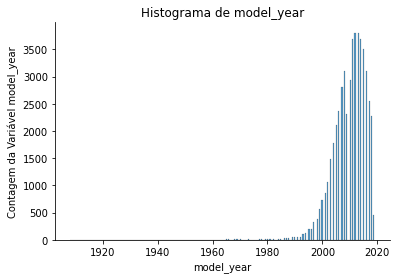

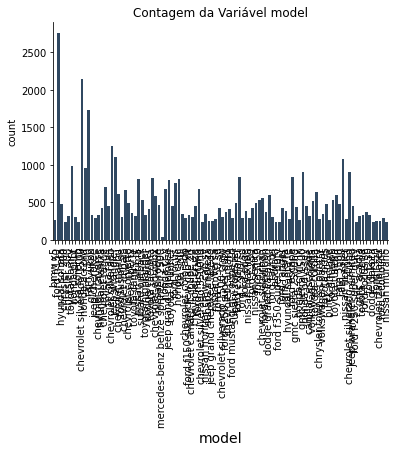

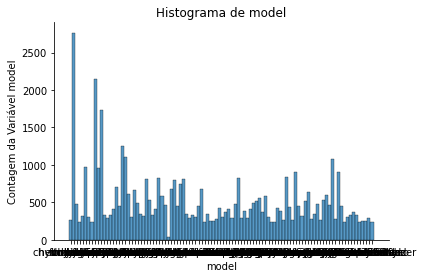

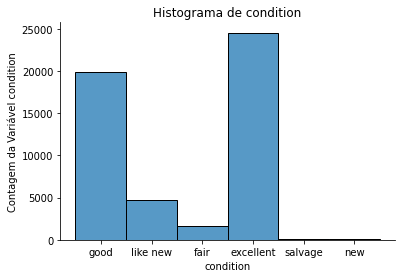

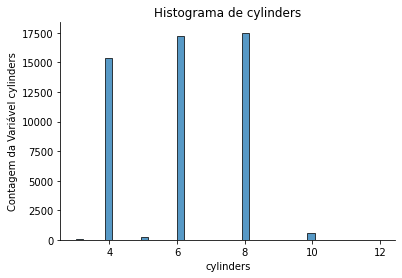

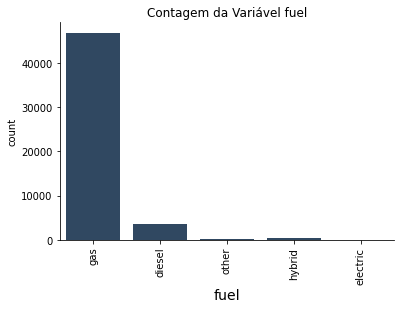

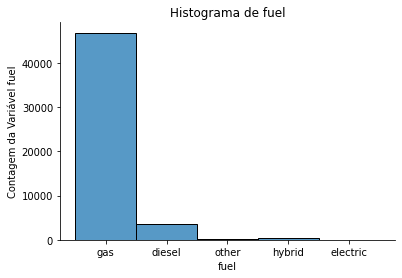

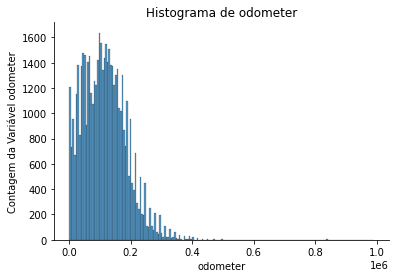

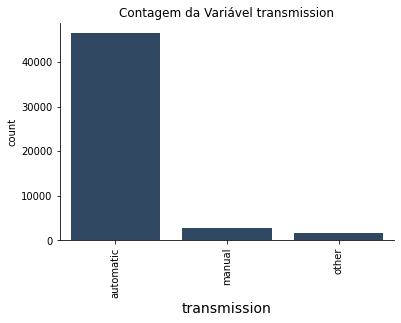

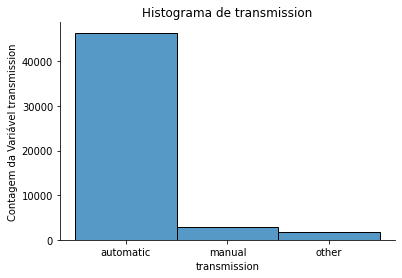

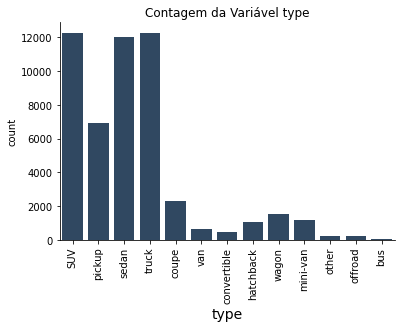

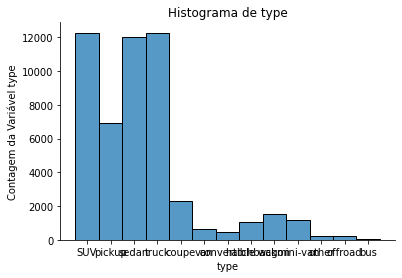

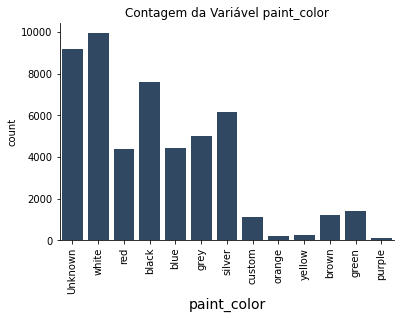

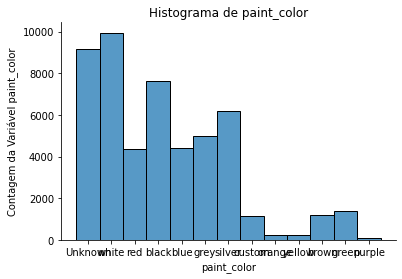

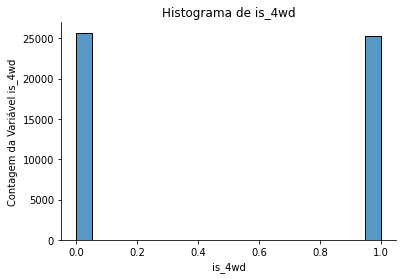

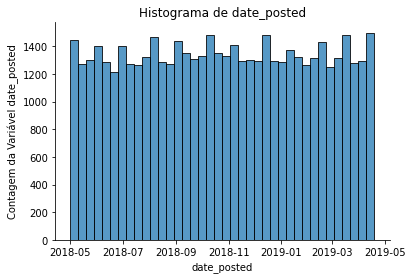

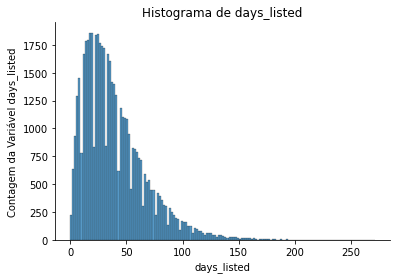

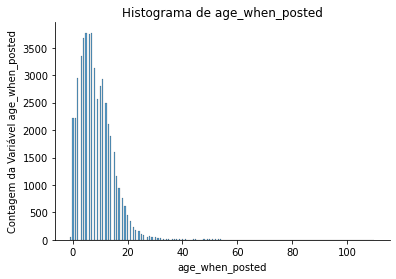

In [134]:
# imprima uma amostragem dos dados
for col in df2.columns:
    if df2.dtypes[col] == 'object':
        sns.countplot(col, data = df2, color = '#284869')
        _ = plt.title("Contagem da Variável " + col)
        plt.xlabel(col, fontsize = 14)
        plt.xticks(rotation = 90)
        sns.despine()
        plt.show()
    if df2.dtypes[col] == "datetime64[ns]":
        pass
    if df2.dtypes[col] == "float64":
        pass
    else:
        sns.histplot(x = col, data = df)
        plt.title('Histograma de ' + col)
        plt.xlabel(col)
        plt.ylabel('Contagem da Variável ' + col)
        sns.despine()
        plt.show()

## Estude os parâmetros fundamentais

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

### Price

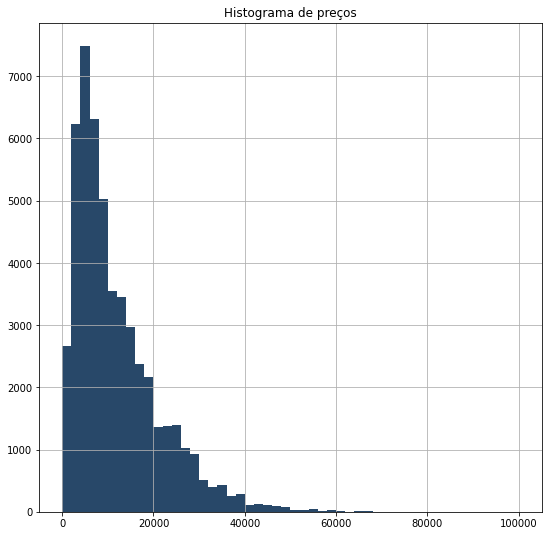

In [73]:
# Preço
df2['price'].hist(color  = '#284869', bins=50, range=(0, 100000), figsize=(9,9))
_ = plt.title('Histograma de preços')

### Age_when_posted

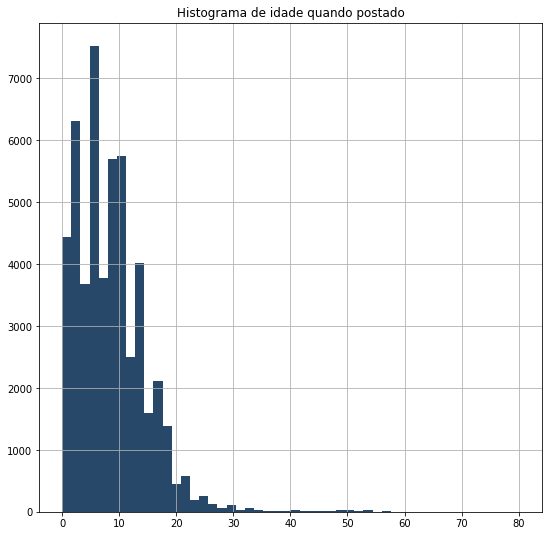

In [74]:
# Age_when_posted
df2['age_when_posted'].hist(color  = '#284869', bins=50, range=(0, 80), figsize=(9,9))
_ = plt.title('Histograma de idade quando postado')

### Odometer

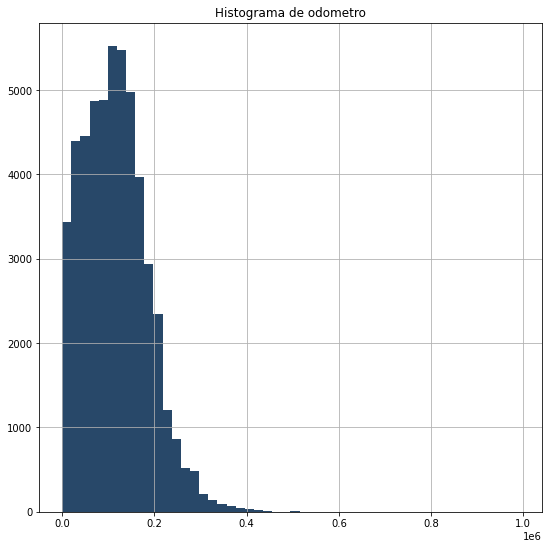

In [75]:
df2['odometer'].hist(color  = '#284869', bins=50, figsize=(9,9))
_ = plt.title('Histograma de odometro')

### Cylinders

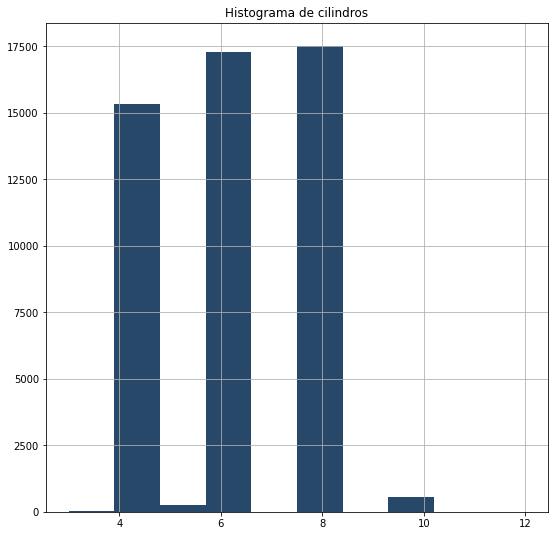

In [76]:
df2['cylinders'].hist(color  = '#284869', figsize=(9,9))
_ = plt.title('Histograma de cilindros')

### Condition

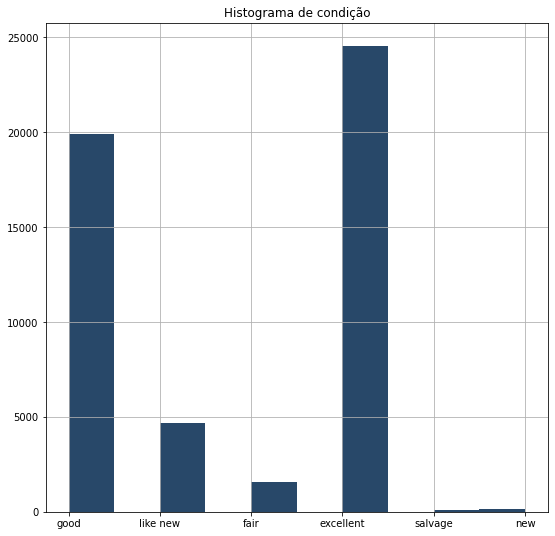

In [77]:
df2['condition'].hist(color  = '#284869', figsize=(9,9))
_ = plt.title('Histograma de condição')

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok!
</div>

## Estude e cuide dos valores atípicos

PRICE
ODOMETER
CYLINDERS
CONDITION


### Price

In [78]:
# Determine o limite inferior para valores atípicos
Q1_price = df2["price"].quantile(.25)
Q1_price

5000.0

In [79]:
# Determine o limite superior para valores atípicos
Q3_price = df2["price"].quantile(.75)
Q3_price

16800.0

In [80]:
IQR_price = Q3_price - Q1_price
outlier_lower_bound = Q1_price - 1.5*IQR_price
outlier_upper_bound = Q3_price + 1.5*IQR_price

In [81]:
outlier_lower_bound

-12700.0

In [82]:
outlier_upper_bound

34500.0

<AxesSubplot:>

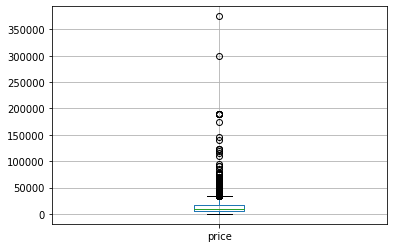

In [83]:
df2.boxplot("price")

### Odometer

In [85]:
# Determine o limite inferior para valores atípicos
Q1_odometer = df2["odometer"].quantile(.25)
Q1_odometer

60765.0

In [86]:
# Determine o limite superior para valores atípicos
Q3_odometer = df2["odometer"].quantile(.75)
Q3_odometer

159700.0

In [87]:
IQR_odometer = Q3_odometer - Q1_odometer
outlier_lower_bound_odometer = Q1_odometer - 1.5*IQR_odometer
outlier_upper_bound_odometer = Q3_odometer + 1.5*IQR_odometer

In [88]:
outlier_lower_bound_odometer

-87637.5

In [89]:
outlier_upper_bound_odometer

308102.5

<AxesSubplot:>

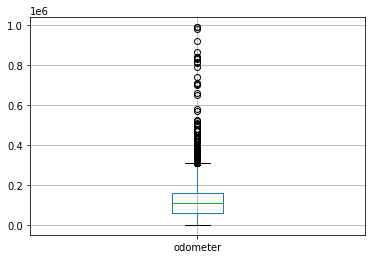

In [90]:
df2.boxplot("odometer")

### Condition

In [139]:
# Determine o limite inferior para valores atípicos
Q1_condition = df2["condition"].quantile(.25)
Q1_condition

2.0

In [140]:
# Determine o limite superior para valores atípicos
Q3_condition = df2["condition"].quantile(.75)
Q3_condition

3.0

In [141]:
IQR_condition = Q3_condition - Q1_condition
outlier_lower_bound_condition = Q1_condition - 1.5*IQR_condition
outlier_upper_bound_condition = Q3_condition + 1.5*IQR_condition

In [142]:
outlier_lower_bound_condition

0.5

In [143]:
outlier_upper_bound_condition

4.5

<AxesSubplot:>

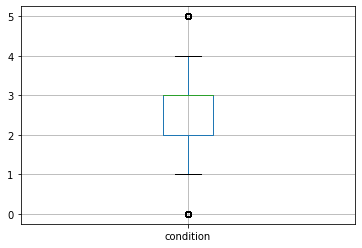

In [144]:
df2.boxplot("condition")

In [145]:
# Criando um novo dataframe sem os valores atipicos das 3 variavéis
df_final = df2.query("odometer <= 308050 and price <= 34500 and condition > 0 and condition < 5")

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Muito bem Matheus!
</div>

## Estude os parâmetros fundamentais sem valores atípicos

In [147]:
df_final.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_when_posted,km_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,Unknown,1,2018-06-23,19,7,18125.0
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,5,14784.0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,6,18333.0
3,1500,2003,ford f-150,1,8,gas,248769,automatic,pickup,Unknown,0,2019-03-22,9,16,15548.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2,40452.0


### Price

<AxesSubplot:>

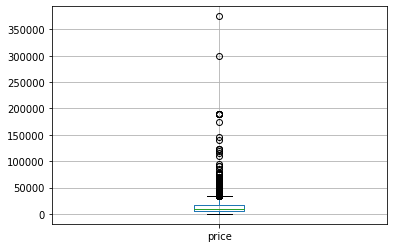

In [149]:
df2.boxplot("price")

<AxesSubplot:>

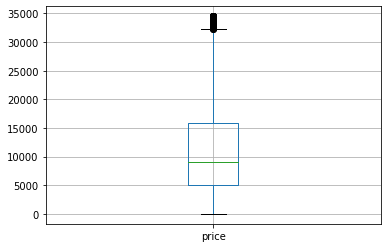

In [150]:
df_final.boxplot("price")

Aqui temos a variavél "Price" sem valores outliers e com a nova distribuição de dados entre 0 e 35000. Antes da remoção dos valores atipicos esta distruição ia de 0 a 350000, valore 10x maior que após a limpeza dos dados.

### Odometer

<AxesSubplot:>

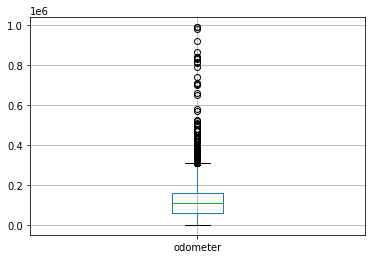

In [151]:
df2.boxplot("odometer")

<AxesSubplot:>

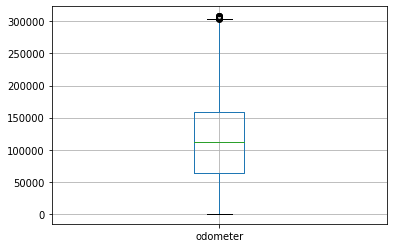

In [153]:
df_final.boxplot("odometer")

Aqui temos a variavél "Odometer" sem valores outliers e com a nova distribuição de dados entre 0 e 300000. Antes da remoção dos valores atipicos esta distruição ia de 0 a 1.000.000, valore 3x maior que após a limpeza dos dados.

### Condition

<AxesSubplot:>

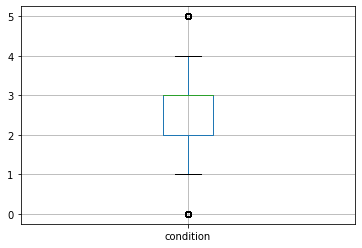

In [154]:
df2.boxplot("condition")

<AxesSubplot:>

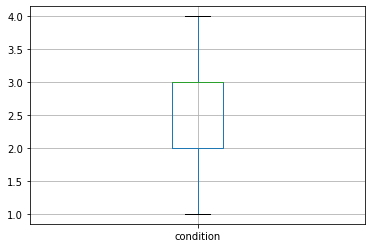

In [155]:
df_final.boxplot("condition")

Aqui temos a variavél "Condition" sem valores outliers e com a nova distribuição de dados entre 1 e 4. Antes da remoção dos valores atipicos esta distruição ia de 0 a 5.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Muito bem visualizado!
</div>

## Tempo de vida das propagandas

In [100]:
df_odometer_typical["days_listed"].describe()

count    48774.000000
mean        39.536802
std         28.187975
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<AxesSubplot:>

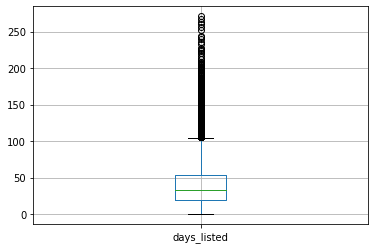

In [101]:
df_odometer_typical.boxplot("days_listed")

In [102]:
# Determine o limite inferior para valores atípicos
Q1_days_listed = df_odometer_typical["days_listed"].quantile(.25)
Q1_days_listed

19.0

In [103]:
# Determine o limite superior para valores atípicos
Q3_days_listed = df_odometer_typical["days_listed"].quantile(.75)
Q3_days_listed

53.0

In [104]:
IQR_days_listed = Q3_days_listed - Q1_days_listed
outlier_lower_bound = Q1_days_listed - 1.5*IQR_days_listed
outlier_upper_bound = Q3_days_listed + 1.5*IQR_days_listed

In [105]:
outlier_lower_bound

-32.0

In [106]:
outlier_upper_bound

104.0

O tempo de vida útil comum de uma propaganda é de 33 dias.

Propagandas com menos de 19 dias foram removidas rapidamente.

Propagandas acima de 104 dias foram listadas por um tempo anormalmente longo.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Bem observado!
</div>

## Média de preços por cada tipo de veículo

In [108]:
a = df_odometer_typical.pivot_table(index="type", values=["days_listed","price"], 
                   aggfunc={"days_listed": "count", "price":"mean"}).sort_values(by="days_listed"
                                                                                 , ascending=False)
a

,days_listed,price
type,,
sedan,11959,6964.048165
SUV,11871,10401.270407
truck,11235,14941.377481
pickup,6418,14775.126675
coupe,2167,13364.537148
wagon,1502,8908.736352
mini-van,1136,8038.349472
hatchback,1033,6861.946757
van,583,8774.481990


Os dois veículos com maior número de propaganda são Sedan e SUV.

<AxesSubplot:title={'center':'Número de propagandas por tipo de veículo'}, ylabel='type'>

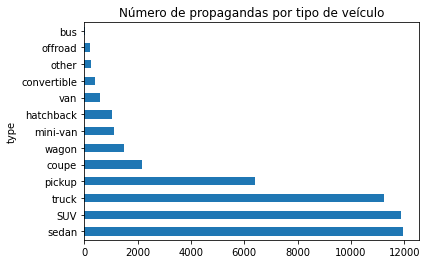

In [109]:
a["days_listed"].plot(kind="barh", ylabel="Numero de propagandas", title="Número de propagandas por tipo de veículo")

## Fatores de preço

[Quais fatores impactam mais o preço? Pegue cada um dos tipos populares que você detectou no estágio anterior e estude se o preço depende da idade, quilometragem, condição, tipo de transmissão e cor. Para variáveis categóricas (tipo de transmissão e cor), construa gráficos de extremos e quartis, e crie gráficos de dispersão para o restante. Quando analisar variáveis categóricas, perceba que as categorias devem ter pelo menos 50 propagandas, caso contrário, seus parâmetros não serão válidos para analisar.]

In [180]:
suv = df_final.query("type == 'SUV'")
sedan = df_final.query("type == 'sedan'")

In [158]:
suv.corr().style.background_gradient(cmap = 'coolwarm').set_precision(2)

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,age_when_posted,km_year
price,1.00,0.57,0.27,0.00,-0.52,0.11,-0.02,-0.57,0.15
model_year,0.57,1.00,0.31,-0.27,-0.65,-0.07,-0.02,-1.00,0.39
condition,0.27,0.31,1.00,-0.10,-0.32,-0.01,-0.01,-0.31,0.01
cylinders,0.00,-0.27,-0.10,1.00,0.24,0.12,0.01,0.27,-0.10
odometer,-0.52,-0.65,-0.32,0.24,1.00,0.04,0.01,0.65,0.19
is_4wd,0.11,-0.07,-0.01,0.12,0.04,1.00,-0.01,0.07,-0.03
days_listed,-0.02,-0.02,-0.01,0.01,0.01,-0.01,1.00,0.02,-0.02
age_when_posted,-0.57,-1.00,-0.31,0.27,0.65,0.07,0.02,1.00,-0.38
km_year,0.15,0.39,0.01,-0.10,0.19,-0.03,-0.02,-0.38,1.00


In [181]:
sedan.corr().style.background_gradient(cmap = 'coolwarm').set_precision(2)

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,age_when_posted,km_year
price,1.00,0.59,0.29,-0.04,-0.56,0.04,0.00,-0.58,0.14
model_year,0.59,1.00,0.29,-0.14,-0.64,0.07,-0.00,-1.00,0.36
condition,0.29,0.29,1.00,-0.05,-0.32,0.02,-0.01,-0.29,0.01
cylinders,-0.04,-0.14,-0.05,1.00,0.07,0.22,0.00,0.13,-0.05
odometer,-0.56,-0.64,-0.32,0.07,1.00,-0.06,0.00,0.64,0.25
is_4wd,0.04,0.07,0.02,0.22,-0.06,1.00,0.01,-0.07,0.01
days_listed,0.00,-0.00,-0.01,0.00,0.00,0.01,1.00,0.00,-0.00
age_when_posted,-0.58,-1.00,-0.29,0.13,0.64,-0.07,0.00,1.00,-0.35
km_year,0.14,0.36,0.01,-0.05,0.25,0.01,-0.00,-0.35,1.00


### Age

#### SUV

<AxesSubplot:xlabel='model_year', ylabel='price'>

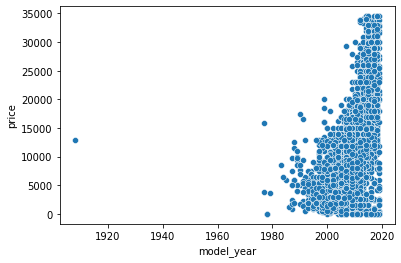

In [231]:
# Price x model_year
sns.scatterplot('model_year', 'price', data = suv)

#### Sedan

<AxesSubplot:xlabel='model_year', ylabel='price'>

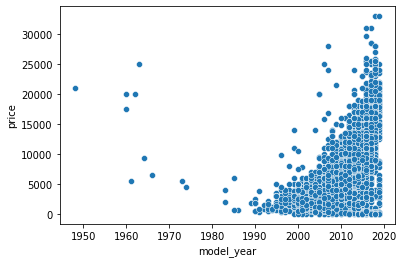

In [183]:
# Price x model_year
sns.scatterplot('model_year', 'price', data = sedan)

### Odometer

#### SUV

<AxesSubplot:xlabel='odometer', ylabel='price'>

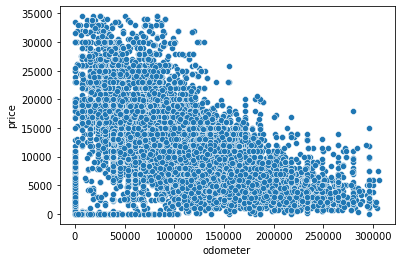

In [160]:
# Price x odometer
sns.scatterplot('odometer', 'price', data = suv)

#### Sedan

<AxesSubplot:xlabel='odometer', ylabel='price'>

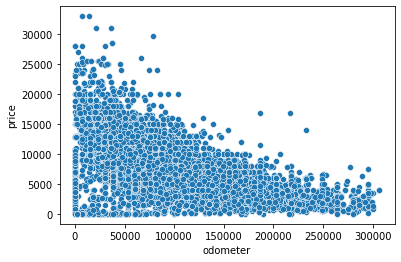

In [184]:
# Price x odometer
sns.scatterplot('odometer', 'price', data = sedan)

### Condition

#### SUV

In [186]:
suv["condition"].value_counts()

3    6267
2    4181
4    1079
1     308
Name: condition, dtype: int64

<AxesSubplot:xlabel='condition', ylabel='price'>

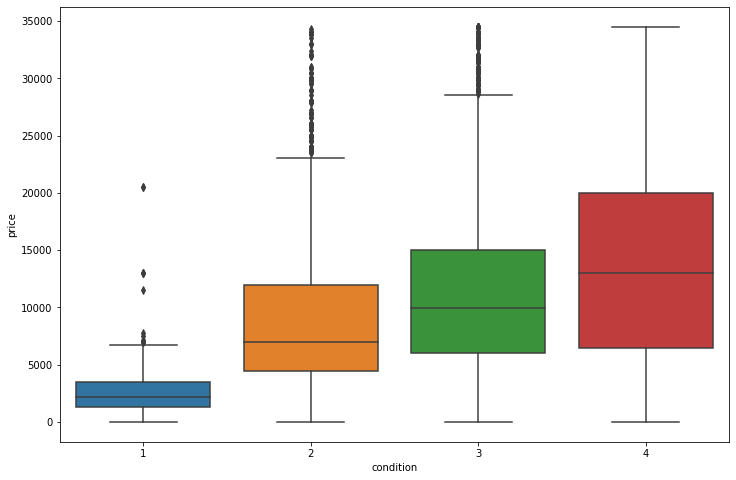

In [185]:
# Price x condition
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot("condition", "price", data = suv, ax = ax)

#### Sedan

In [188]:
sedan["condition"].value_counts()

3    6068
2    4220
4    1293
1     290
Name: condition, dtype: int64

<AxesSubplot:xlabel='condition', ylabel='price'>

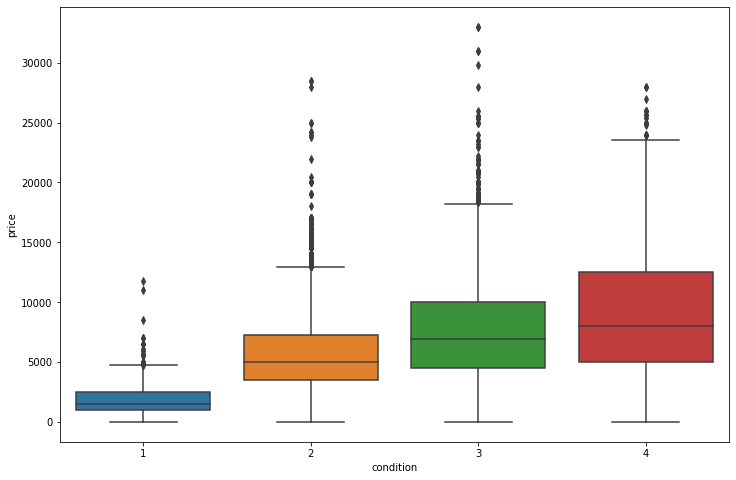

In [189]:
# Price x condition
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot("condition", "price", data = sedan, ax = ax)

### Transmission

#### SUV

In [190]:
suv["transmission"].value_counts()

automatic    11194
manual         484
other          157
Name: transmission, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='price'>

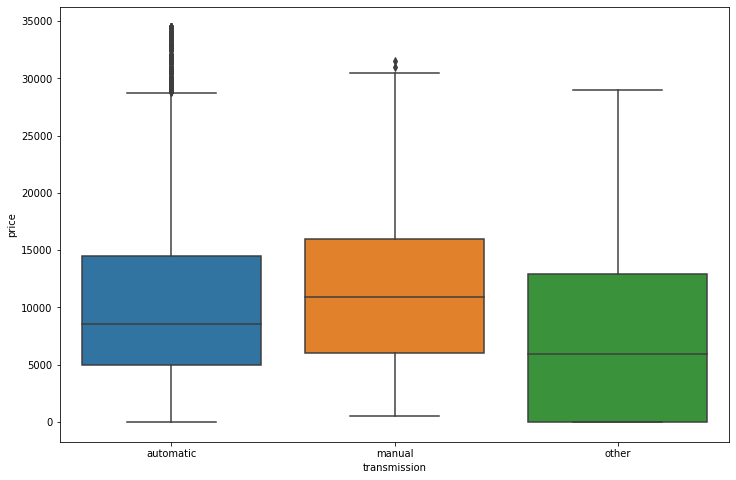

In [191]:
# Price x transmission
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot("transmission", "price", data = suv, ax = ax)

#### Sedan

In [193]:
sedan["transmission"].value_counts()

automatic    11159
manual         582
other          130
Name: transmission, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='price'>

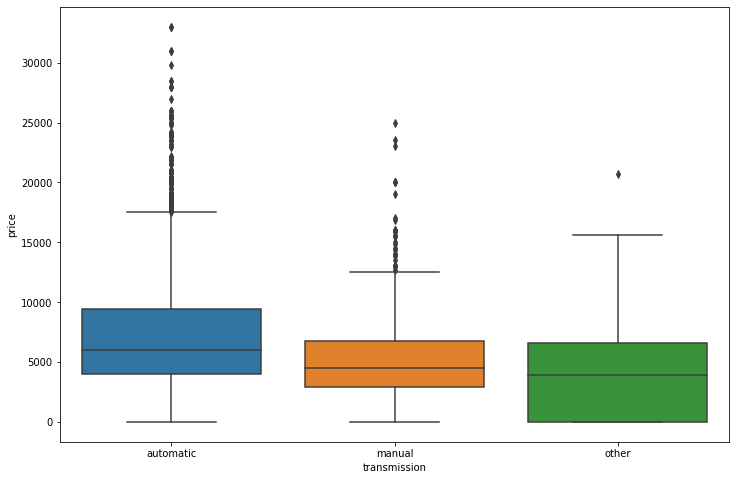

In [194]:
# Price x transmission
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot("transmission", "price", data = sedan, ax = ax)

### Paint_color

#### SUV

In [1]:
suv["paint_color"].value_counts()

NameError: name 'suv' is not defined

In [203]:
######## Como fazer um query para filtrar as cores com < 50 anuncios???? ################

<div class="alert alert-block alert-warning">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Depois de ter visualizado as cores com menos de 50 anúncios, pode removê-las manualmente numa cópia da tabela suv.
</div>

<AxesSubplot:xlabel='paint_color', ylabel='price'>

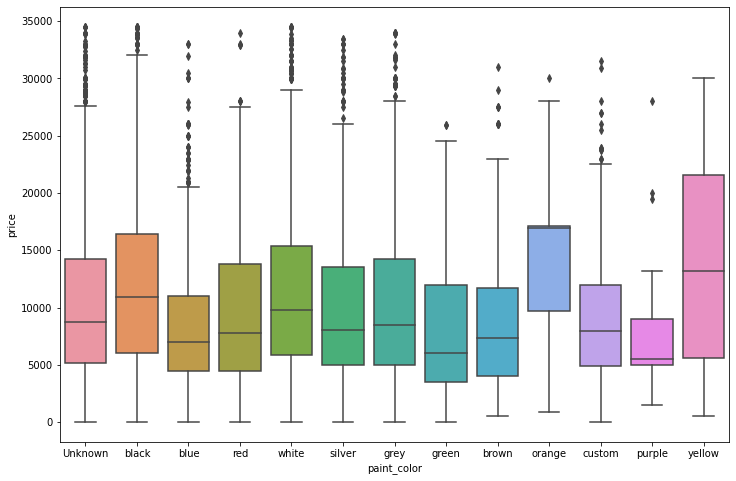

In [196]:
# Price x paint_color
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot("paint_color", "price", data = suv, ax = ax)

#### Sedan

In [204]:
sedan["paint_color"].value_counts()

Unknown    2141
silver     2012
black      1735
grey       1588
white      1480
blue       1198
red         927
custom      287
brown       247
green       200
purple       25
yellow       22
orange        9
Name: paint_color, dtype: int64

<AxesSubplot:xlabel='paint_color', ylabel='price'>

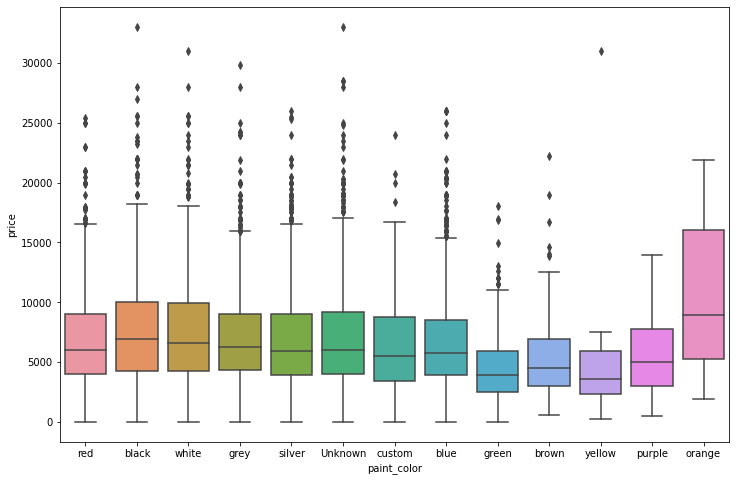

In [205]:
# Price x paint_color
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot("paint_color", "price", data = sedan, ax = ax)

## Conclusão Geral

O preço aumenta com a idade do veículo. Veículos mais novos são mais caros que veículos mais antigos.

O preço diminui consideravelmente inversamente proporcional ao valor do odometro.

O preço tem uma coreção proporcional com a condição em que o veículo se encontra.

Em relação ao tipo de tranmissão, os valores dos veículos são bem parecidos mas ligeiramente maiores para tipo de transmissão manual para tipos SUV e ligeiamente menores para tipo de transmissão automática para tipos Sedan.

Para veículos do tipo SUV, a cor preta (maior amostragem) é ligeiramente mais cara que as outras 3 maiores. (Branca, Cinza e Azul)

Para veículos do tipo Sedan, a cor não influencia significativamente no preço do veículo.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ótimas conclusões Matheus!
</div>